In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
base_dir="/content/drive/MyDrive/mini_project dataset/dataset"

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

# Pre-processing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_images = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

val_images = test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 1141 images belonging to 4 classes.
Found 125 images belonging to 4 classes.


In [ ]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(
                    input_shape=(224, 224, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False

In [ ]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(50, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history = model.fit(train_images,validation_data=val_images,epochs=35,
    callbacks=[callbacks])

Epoch 1/35
36/36 [==============================] - 33s 906ms/step - loss: 1.0744 - accuracy: 0.5434 - val_loss: 1.2358 - val_accuracy: 0.4640
Epoch 2/35
36/36 [==============================] - 33s 928ms/step - loss: 1.0512 - accuracy: 0.5679 - val_loss: 1.1974 - val_accuracy: 0.4720
Epoch 3/35
36/36 [==============================] - 28s 784ms/step - loss: 1.0525 - accuracy: 0.5811 - val_loss: 1.1153 - val_accuracy: 0.4880
Epoch 4/35
36/36 [==============================] - 30s 843ms/step - loss: 1.0322 - accuracy: 0.5653 - val_loss: 1.1096 - val_accuracy: 0.5280
Epoch 5/35
36/36 [==============================] - 28s 782ms/step - loss: 1.0548 - accuracy: 0.5723 - val_loss: 1.1267 - val_accuracy: 0.4800
Epoch 6/35
36/36 [==============================] - 28s 773ms/step - loss: 1.0577 - accuracy: 0.5583 - val_loss: 1.1176 - val_accuracy: 0.5040
Epoch 7/35
36/36 [==============================] - 30s 839ms/step - loss: 1.0705 - accuracy: 0.5574 - val_loss: 1.1030 - val_accuracy: 0.5280

In [ ]:
results = model.evaluate(val_images, verbose=0)
print(results)
print(f"Test Accuracy: {np.round(results[1] * 100,2)}%")

[1.079757809638977, 0.5759999752044678]
Test Accuracy: 57.6%


In [ ]:
predictions = np.argmax(model.predict(val_images), axis=1)
matrix = confusion_matrix(val_images.labels, predictions)
report= classification_report(val_images.labels, predictions, target_names=val_images.class_indices, zero_division=0)

4/4 [==============================] - 3s 653ms/step


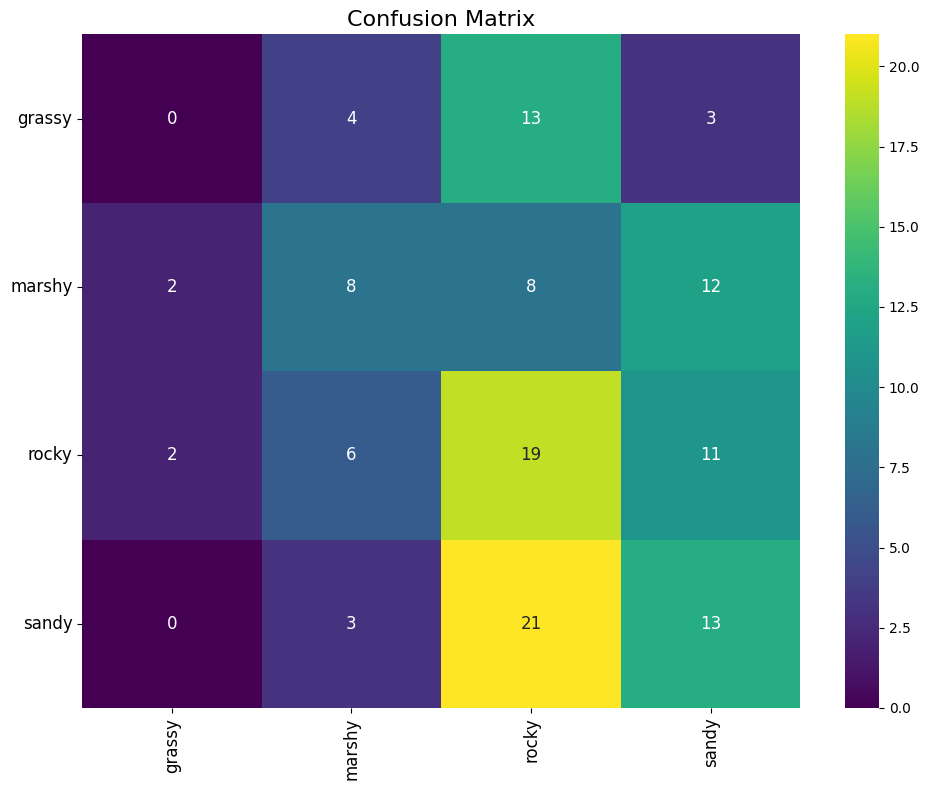

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='viridis', annot_kws={"size": 12})  # Adjust the font size here
plt.xticks(ticks=np.arange(4) + 0.5, labels=val_images.class_indices.keys(), rotation=90, fontsize=12)  # Adjust the font size here
plt.yticks(ticks=np.arange(4) + 0.5, labels=val_images.class_indices.keys(), rotation=0, fontsize=12)  # Adjust the font size here
plt.title("Confusion Matrix", fontsize=16)  # Adjust the title font size here
plt.tight_layout()  # Adjust layout to prevent clipping of labels
fig.savefig("Confusion Matrix", dpi=700)

In [ ]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      grassy       0.00      0.00      0.00        20
      marshy       0.38      0.27      0.31        30
       rocky       0.31      0.50      0.38        38
       sandy       0.33      0.35      0.34        37

    accuracy                           0.32       125
   macro avg       0.26      0.28      0.26       125
weighted avg       0.28      0.32      0.29       125



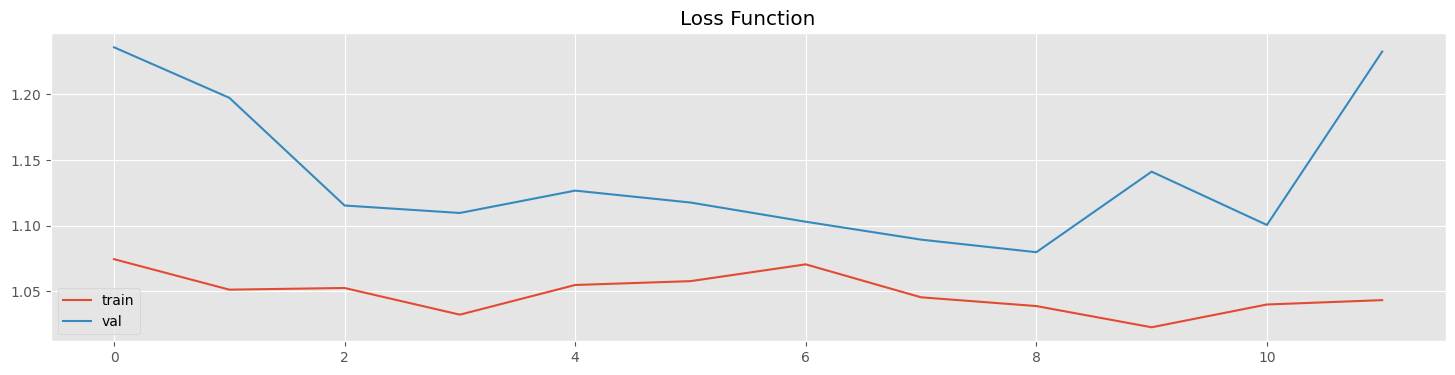

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

In [ ]:
model.save("renet50.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
